## CAVI --> Coordinate Ascent Mean Field Variational Inference

We have a gaussian mixture model. Need to find the underlying parameters.
Instead of finding the parameters directly we find assume a family of distribution, and find a distribution which is closest to the posterior distribution.
Closeness is measured by using KL-divergence metric.
Mean Field Variational family: Assumes that the latent variables are mutually independent.

Cost Function: ELBO Evidence Lower Bound

CAVI maximizes ELBO by updating one of the latent variable of the mean field variational family, keeping the other variables constant.


In [28]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = 10,6
import seaborn as sns
import numpy as np
import pandas as pd

from collections import defaultdict, Counter
np.random.seed(42)

import math
from scipy.stats import multivariate_normal as mv


In [29]:

def generate_data(var= 15, k=10, size = 1000):
    mu_actual = np.random.normal(loc=0, scale=var, size= k)
    data = np.empty(size)
    actual_mu = np.empty(size)
    data_plt = defaultdict(list)
    for _ in range(size):
        col = np.random.choice(k)
        tmp_mu = mu_actual[col]
        data[_] = np.random.normal(loc=tmp_mu, scale=1, size= 1)
        actual_mu[_] = tmp_mu
        data_plt[col].append(data[_])
    return data, actual_mu, data_plt
    

In [30]:
K=4
SIZE = 10000
dat, mu, data_p = generate_data(k=K, size=SIZE)

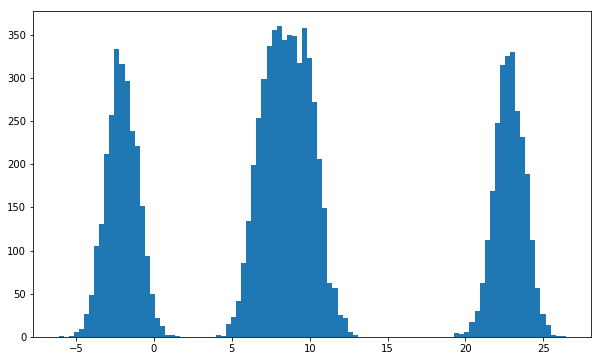

In [31]:
plt.hist(dat,bins=100)
plt.show()

In [32]:
def compute_elbo(var_mu, var_var, var_cat_point):
    pass

def cavi(data, prior_var=1, k=10,size=1000):
    ## initialize params
    cat_point = np.zeros((size,k))
    for _ in range(size):
        cat_point[_, np.random.choice(k)] = 1
    

    mu = np.random.normal(loc=0, scale=10, size= k)
    var = np.random.rand(k)*k
    mu_new = np.zeros(k)
    var_new = np.zeros(k)
    while True:
        for i in range(size):
            cat_point[i]  = np.exp(mu*data[i] - (var+mu**2)/2)
            cat_point[i] = cat_point[i]/np.sum(cat_point[i])
        
        for j in range(k):
            mu_new[j] = np.sum(cat_point[:,j]*data)/((1/prior_var) + np.sum(cat_point[:,j]))
            var_new[j] = 1/((1/prior_var) + np.sum(cat_point[:,j]))
        
        if np.dot(mu-mu_new,mu-mu_new) < 0.0000001:
            break
        mu = mu_new
        var = var_new
        
    mixture_components = list(zip(mu_new,var_new))
    mixture_components.sort()
    return mixture_components, cat_point

#         new_elbo = compute_elbo(mu_new, var_new, cat_point)
#         if new_elbo - old_elbo < error:
#             break
#         else:
#             old_elbo = new_elbo

In [33]:
mu_var, cluster_prob = cavi(dat, k = K, size = SIZE)
mu_var

[(-2.409995922206579, 0.0005319043108985289),
 (1.487814874210359, 0.0019218869949739665),
 (1.4878293304151884, 0.001921883619045752),
 (13.770094939455106, 0.0001411767807752318)]

In [34]:
##difference of means actual vs calculated
np.sort(np.unique(mu))-np.sort([item[0] for item in mu_var])

array([0.3360314 , 5.96289742, 8.22749874, 9.07535291])

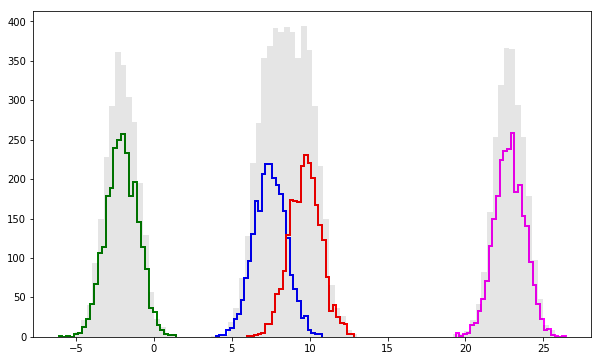

In [35]:
color = ['blue', 'green', 'red', 'magenta', 'yellow']

for k in range(K):
    plt.hist(data_p[k], bins=30, color=color[k], histtype='step', lw=2)
plt.hist(dat, color='k', bins=90, alpha=0.1)
plt.show()

C:\Users\onkar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


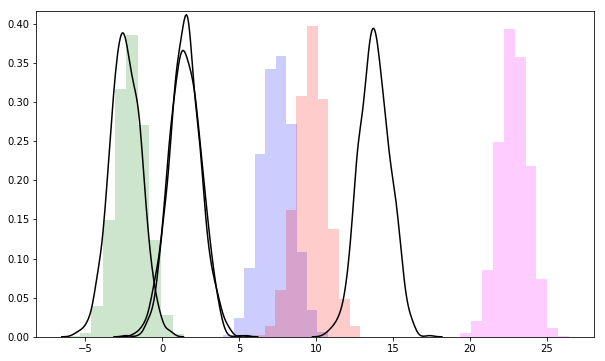

In [36]:
for k in range(K):
    plt.hist(data_p[k], bins=10, color=color[k], alpha=0.2, normed=True)
for k in range(K):
    vals=np.random.normal(mu_var[k][0], 1, size=1000)
    sns.kdeplot(vals,  color='k')
plt.show()

In [37]:
arr_ = [np.argmax(cluster_prob[i]) for i in range(SIZE)]
arr_map = Counter(arr_)
df_dict = defaultdict(list)
mu_tmp = np.unique(mu)
for i in range(K):
    df_dict['Actual mean'].append(mu_tmp[i])
    df_dict['CAVI mean'].append(mu_var[i][0])
    df_dict['Actual number of points'].append(len(data_p[i]))
    df_dict['GMM points'].append(arr_map[i])

pd.DataFrame(df_dict)

,Actual mean,CAVI mean,Actual number of points,GMM points
0,-2.073965,-2.409996,2512,310
1,7.450712,1.487815,2538,379
2,9.715328,1.487829,2434,2189
3,22.845448,13.770095,2516,7122
